In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from os import system
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, HalvingRandomSearchCV
from sklearn.feature_selection import mutual_info_classif

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
print(df_train.columns.tolist())
print(np.shape(df_train))
df_train.head()

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'COLGSEX1', 'NUMADULT', 'LANDSEX1', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX1', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID,TARGET
0,2.0,5.0,5132022,5,13,2022,1100.0,2022000436,2.022000e+09,1.0,...,1.0,2.700000e+01,1.0,1.870000e+02,1.0,1.0,1.0,2.0,0,True
1,9.0,1.0,2282022,2,28,2022,1200.0,2022005381,2.022005e+09,NaN,...,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,NaN,1,False
2,19.0,1.0,1202022,1,20,2022,1100.0,2022000927,2.022001e+09,1.0,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,9.0,2,False
3,39.0,8.0,8122022,8,12,2022,1100.0,2022014408,2.022014e+09,NaN,...,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,3,False
4,25.0,7.0,7222022,7,22,2022,1200.0,2022010910,2.022011e+09,NaN,...,1.0,1.700000e+01,2.0,4.670000e+02,1.0,NaN,NaN,2.0,4,False


In [5]:
df_train.columns[240]

'RRPHYSM2'

In [23]:
keep_columns = ['_STATE', 'LADULT1', 'COLGSEX1', 'LANDSEX1', 'CADULT1', 'CELLSEX1', 'SEXVAR',
                'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1',
                'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'CVDSTRK3', 'ASTHMA3',
                'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4',
                'VETERAN3', 'WEIGHT2', 'HEIGHT3', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'CERVSCRN',
                'CRVCLPAP', 'CIMEMLOS', 'CAREGIV1', 'SDHISOLT', 'SDHEMPLY', 'MARIJAN1', 'LASTSMK2',
                'ASBIDRNK']

delete_columns = [ 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1',
                  'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'NUMADULT', 'NUMMEN', 'NUMWOMEN',
                  'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1',
                  'LANDLINE', 'HHADULT', 'LASTDEN4', 'RMVTETH4', 'HAVARTH4', 'MARITAL', 'EDUCA',
                  'RENTHOM1', 'NUMHHOL4', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'DEAF', 'BLIND',
                  'DECIDE', 'HADMAM', 'HOWLONG', 'CRVCLCNC', 'PCSTALK1', 'CDHOUSE', 'CDASSIST', 'CDHELP',
                  'CDSOCIAL', 'CDDISCUS', 'CRGVREL4', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB3', 'CRGVALZD',
                  'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT', 'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN',
                  'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX',
                  'ACEADSAF', 'ACEADNED', 'EMPSUPRT', 'LSATISFY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS',
                  'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'MARJSMOK', 'MARJEAT', 'MARJVAPE', 'MARJDAB',
                  'MARJOTHR', 'STOPSMK2', 'MENTCIGS', 'MENTECIG', 'HEATTBCO', 'ASBIALCH', 'ASBIBING',
                  'ASBIADVC', 'ASBIRDUC', 'FIREARM5', 'GUNLOAD', 'LOADULK2', 'RCSGEND1', 'RCSXBRTH',
                  'RCSRLTN2', 'CASTHDX2', 'CASTHNO2', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR',
                  'HADSEX', 'PFPPRVN4', 'TYPCNTR9', 'BRTHCNT4', 'WHEREGET', 'NOBCUSE8', 'BCPREFER',
                  'RRCLASS3', 'RRCOGNT2', 'RRTREAT', 'RRATWRK2', 'RRHCARE4', 'RRPHYSM2' ]


missing_columns = ['CVDINFR4', 'CVDCRHD4']


In [24]:
df_train[keep_columns].head()

,_STATE,LADULT1,COLGSEX1,LANDSEX1,CADULT1,CELLSEX1,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,...,DIFFALON,CERVSCRN,CRVCLPAP,CIMEMLOS,CAREGIV1,SDHISOLT,SDHEMPLY,MARIJAN1,LASTSMK2,ASBIDRNK
0,2.0,1.0,NaN,2.0,NaN,NaN,2.0,3.0,30.0,88.0,...,2.0,2.0,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN
1,9.0,NaN,NaN,NaN,1.0,2.0,2.0,3.0,88.0,15.0,...,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19.0,1.0,NaN,NaN,NaN,NaN,1.0,2.0,88.0,88.0,...,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN
3,39.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,88.0,88.0,...,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
4,25.0,NaN,NaN,NaN,1.0,1.0,1.0,3.0,88.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<BarContainer object of 41 artists>

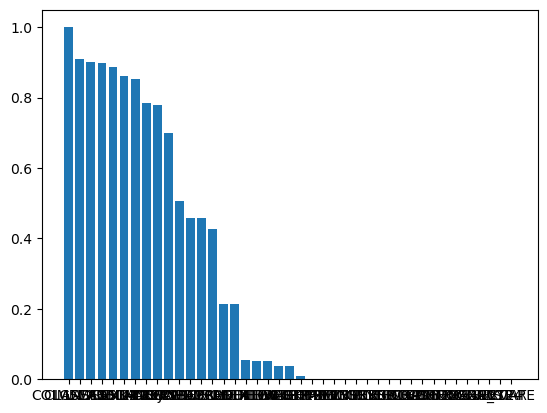

In [ ]:
nan_proportion = df_train[keep_columns].isna().sum() / len(df_train)
nan_proportion.sort_values(ascending=False,inplace=True)
plt.bar(nan_proportion.index,nan_proportion.values)
plt.xticks(rotation=90)